# Analysing Air Quality in India

This is a course project associated with the course [Data Analysis with Python: Zero to Pandas](zerotopandas.com), which covers basic Python programming, NumPy, pandas and matplotlib. This project notebook implements the concepts covered to analyse the air quality in India. To do so, the dataset [Air Quality Data in India (2015 - 2020)](https://www.kaggle.com/rohanrao/air-quality-data-in-india) is used, which contains daily and hourly data of pollutants and Air Quality Index of stations and cities across India. The dataset is obtained from [Kaggle](https://www.kaggle.com/).

We'll look at relationships between various parameters, what we can conclude from them and make arithmetic modifications so that we can use the information available in a fruitful way. 

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

First, we'll install the [`opendatasets` Python library](https://github.com/JovianML/opendatasets#opendatasets) in order to download the dataset easily, without having to go through the hassle of downloading it to our local machine and then uploading it manually each time.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/rohanrao/air-quality-data-in-india' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sejalgupta01
Your Kaggle Key: ········


 26%|██▌       | 19.0M/72.9M [00:00<00:00, 192MB/s]

100%|██████████| 72.9M/72.9M [00:00<00:00, 238MB/s]


The dataset has been downloaded and extracted.

In [4]:
data_dir = './air-quality-data-in-india'

In [5]:
import os
os.listdir(data_dir)

['station_hour.csv',
 'city_hour.csv',
 'stations.csv',
 'station_day.csv',
 'city_day.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "air-quality-in-india" 

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "sejalgupta01/air-quality-in-india" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sejalgupta01/air-quality-in-india


'https://jovian.ml/sejalgupta01/air-quality-in-india'

## Data Preparation and Cleaning

After we have our data directory containing the csv file(s), the first step is to import pandas and using the `read_csv` function, load the dataset into a data frame. We explore the data in the file 'station_day.csv' which contains daily statistics of the pollutants and Air Quality Index for stations across India. We use `info()` and `describe()` on the data frame to get a brief idea about the dataset. When we display a snippet of the whole dataframe, we see `nan` values in some of the columns. To deal with that, we use `interpolate()` which does exactly what it means, using related known values to estimate unknown values. We parse the date into year, month and date. Lastly, we add a new column called **Total_conc**, which contains the sum of the concentrations of all the pollutants for each row. 

In [10]:
import pandas as pd

In [11]:
air_quality_raw_df = pd.read_csv(data_dir + '/station_day.csv')

In [12]:
air_quality_raw_df

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108030,WB013,2020-06-27,8.65,16.46,NaN,NaN,NaN,NaN,0.69,4.36,30.59,1.32,7.26,NaN,50.0,Good
108031,WB013,2020-06-28,11.80,18.47,NaN,NaN,NaN,NaN,0.68,3.49,38.95,1.42,7.92,NaN,65.0,Satisfactory
108032,WB013,2020-06-29,18.60,32.26,13.65,200.87,214.20,11.40,0.78,5.12,38.17,3.52,8.64,NaN,63.0,Satisfactory
108033,WB013,2020-06-30,16.07,39.30,7.56,29.13,36.69,29.26,0.69,5.88,29.64,1.86,8.40,NaN,57.0,Satisfactory


In [13]:
air_quality_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108035 entries, 0 to 108034
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   StationId   108035 non-null  object 
 1   Date        108035 non-null  object 
 2   PM2.5       86410 non-null   float64
 3   PM10        65329 non-null   float64
 4   NO          90929 non-null   float64
 5   NO2         91488 non-null   float64
 6   NOx         92535 non-null   float64
 7   NH3         59930 non-null   float64
 8   CO          95037 non-null   float64
 9   SO2         82831 non-null   float64
 10  O3          82467 non-null   float64
 11  Benzene     76580 non-null   float64
 12  Toluene     69333 non-null   float64
 13  Xylene      22898 non-null   float64
 14  AQI         87025 non-null   float64
 15  AQI_Bucket  87025 non-null   object 
dtypes: float64(13), object(3)
memory usage: 13.2+ MB


In [14]:
air_quality_raw_df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,86410.000000,65329.000000,90929.000000,91488.000000,92535.000000,59930.000000,95037.000000,82831.000000,82467.000000,76580.000000,69333.000000,22898.000000,87025.000000
mean,80.272571,157.968427,23.123424,35.240760,41.195055,28.732875,1.605749,12.257634,38.134836,3.358029,15.345394,2.423446,179.749290
std,76.526403,123.418672,34.491019,29.510827,45.145976,24.897797,4.369578,12.984723,39.128004,11.156234,29.348587,6.472409,131.324339
min,0.020000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,8.000000
25%,31.880000,70.150000,4.840000,15.090000,13.970000,11.900000,0.530000,5.040000,18.895000,0.160000,0.690000,0.000000,86.000000
50%,55.950000,122.090000,10.290000,27.210000,26.660000,23.590000,0.910000,8.950000,30.840000,1.210000,4.330000,0.400000,132.000000
75%,99.920000,208.670000,24.980000,46.930000,50.500000,38.137500,1.450000,14.920000,47.140000,3.610000,17.510000,2.110000,254.000000
max,1000.000000,1000.000000,470.000000,448.050000,467.630000,418.900000,175.810000,195.650000,963.000000,455.030000,454.850000,170.370000,2049.000000


In [15]:
air_quality_raw_df['Date'] = pd.to_datetime(air_quality_raw_df.Date)

In [16]:
air_quality_raw_df['year'] = pd.DatetimeIndex(air_quality_raw_df.Date).year
air_quality_raw_df['month'] = pd.DatetimeIndex(air_quality_raw_df.Date).month
air_quality_raw_df['day'] = pd.DatetimeIndex(air_quality_raw_df.Date).day

In [17]:
air_quality_raw_df = air_quality_raw_df.interpolate()

In [38]:
air_quality_raw_df['Total_conc'] = air_quality_raw_df['PM2.5']+air_quality_raw_df['PM10']+air_quality_raw_df['NO']+air_quality_raw_df['NO2']+air_quality_raw_df['NOx']+air_quality_raw_df['NH3']+air_quality_raw_df['CO']+air_quality_raw_df['SO2']+air_quality_raw_df['O3']+air_quality_raw_df['Benzene']+air_quality_raw_df['Toluene']+air_quality_raw_df['Xylene']

In [40]:
air_quality_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108035 entries, 0 to 108034
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   StationId   108035 non-null  object        
 1   Date        108035 non-null  datetime64[ns]
 2   PM2.5       108035 non-null  float64       
 3   PM10        108035 non-null  float64       
 4   NO          108035 non-null  float64       
 5   NO2         108035 non-null  float64       
 6   NOx         108035 non-null  float64       
 7   NH3         108035 non-null  float64       
 8   CO          108035 non-null  float64       
 9   SO2         108035 non-null  float64       
 10  O3          108035 non-null  float64       
 11  Benzene     108035 non-null  float64       
 12  Toluene     108035 non-null  float64       
 13  Xylene      108035 non-null  float64       
 14  AQI         108034 non-null  float64       
 15  AQI_Bucket  87025 non-null   object        
 16  ye

In [41]:
import jovian

In [42]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "sejalgupta01/air-quality-in-india" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sejalgupta01/air-quality-in-india


'https://jovian.ml/sejalgupta01/air-quality-in-india'

We observe that even though, previously there were a lot of null values in most columns, after interpolation there is only 1 null value in the column **AQI**(could not be interpolated because the null value is in the first row), and some null values in **AQI_Bucket**(could not be interpolated because the dtype of AQI_Bucket values is `object`.

## Exploratory Analysis and Visualization

In this section, we draw some graphs and visualizations using seaborn and matplotlib to observe relationships between various parameters, use these visualization and plots to understand the use and meaning of various terminologies, and draw conclusions about the data.

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [21]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 7)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

First we plot a bar graph to observe the average values and standard deviations relative to each other for each pollutant. For this, we create a new data frame called `pollutants_df`, having 2 columns, first column having the pollutant, and the second column having values of concentration of that pollutant from each row of the original data frame, `air_quality_raw_df`.

In [22]:
pollutants = list(air_quality_raw_df.columns)[2:14]
pollutants

['PM2.5',
 'PM10',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'O3',
 'Benzene',
 'Toluene',
 'Xylene']

In [26]:
number_of_rows = air_quality_raw_df.shape[0]
pollutants_list = []
for i in pollutants:
    for j in range(number_of_rows):
        pollutants_list += [i]
len(pollutants_list)

1296420

In [31]:
concentration = []
for i in pollutants:
    concentration += list(air_quality_raw_df[i])
len(concentration)

1296420

In [33]:
pollutants_data = {'Pollutants': pollutants_list, 'Concentration': concentration}
pollutants_df = pd.DataFrame(pollutants_data)
pollutants_df

,Pollutants,Concentration
0,PM2.5,71.36
1,PM2.5,81.40
2,PM2.5,78.32
3,PM2.5,88.76
4,PM2.5,64.18
...,...,...
1296415,Xylene,2.42
1296416,Xylene,2.42
1296417,Xylene,2.42
1296418,Xylene,2.42


<AxesSubplot:xlabel='Pollutants', ylabel='Concentration'>

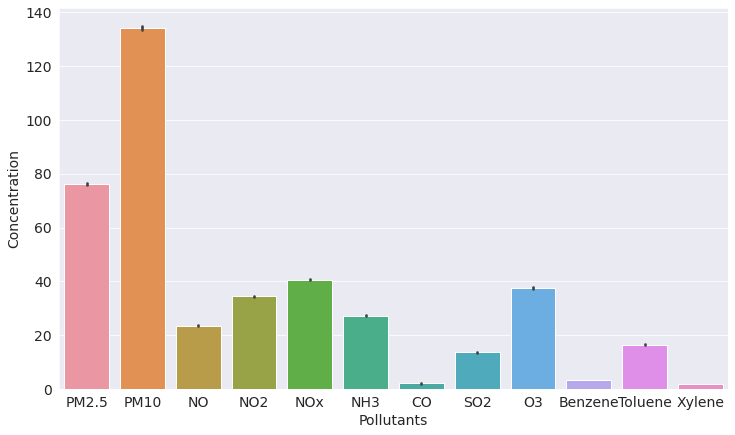

In [34]:
sns.barplot('Pollutants', 'Concentration', data=pollutants_df)

From this bar graph, we observe that, most pollutants don't show high standard deviations relative to their average contributions, except CO, whose standard deviation seems negligible but cannot actually be neglected as it has a very minute average concentration. Overall, we can see that the concentration of particulate matter is the highest and carbon-based pollutants is the lowest.

There are 6 values for **AQI_Bucket**, that is, the Air Quality Index can be categorized into 6 categories, and all the categories are printed below using the `unique()` method. The **Total_conc** is plotted against the **AQI**, different colours representing different categories. This kind of plot is called a scatterplot.

In [43]:
air_quality_raw_df.AQI_Bucket.unique()

array([nan, 'Moderate', 'Poor', 'Very Poor', 'Satisfactory', 'Good',
       'Severe'], dtype=object)

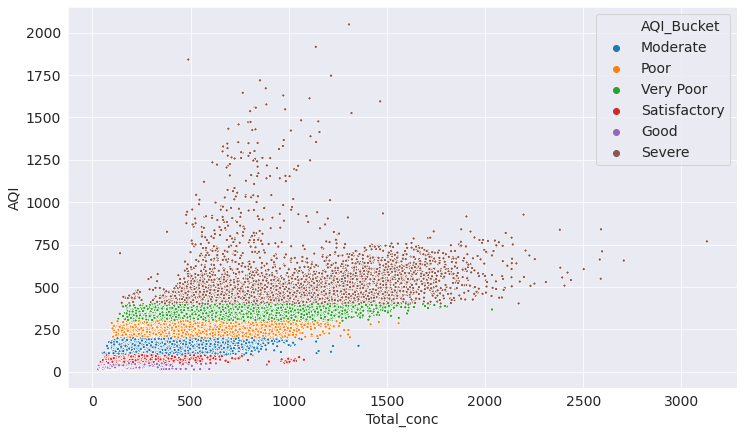

In [44]:
sns.scatterplot(air_quality_raw_df.Total_conc, air_quality_raw_df.AQI, hue=air_quality_raw_df.AQI_Bucket, s=10);

This scatterplot does not show any significant relationship between the total concentration and the Air Quality Index. But it does tell us the follwing things:
1. Higher AQI corresponds to poorer quality of air.
2. Better the quality of air, the lesser chance it has of having higher concentrations of pollutants.
3. The upper limit for the range of total concentrations increases with increasing AQI.


Summing it up, low AQI and negligible range with negigible concentrations map to Good air quality, a bit higher AQI and a small range of small concentrations(larger than pervious) map to Satisfactory, higher AQI with a small range of small concentrations(larger than previous) map to Moderate, even higher AQI with a larger range going from small to medium concentrations map to Poor, even higher AQI with an even larger range going from small to medium concentrations(larger than before) map to Very Poor and finally, the highest values of AQI and a huge range going from small concentrations to very large concentrations map to Severe.

Let's plot a heat map to observe the AQI for each month across 6 years. To do that, we create a new dataframe, `year_month_df`, which contains the average AQI for each month for each year. We add the columns for **year** and **month** explicitly, as, in the groupby object they behave as indexing columns. Then, using the `pivot()` method, we convert it to a matrix sort of a dataframe called `air_quality_matrix` and using that, plot a heat map.

In [48]:
year_month_df = air_quality_raw_df.groupby(['year', 'month'])[['AQI']].mean()
year_month_df['year'] = [2015]*12 + [2016]*12 + [2017]*12 + [2018]*12 + [2019]*12 + [2020]*7
year_month_df['month'] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]*5 + [1, 2, 3, 4, 5, 6, 7]

In [49]:
air_quality_matrix = year_month_df.pivot("month", "year", "AQI")

In [50]:
air_quality_matrix

year,2015,2016,2017,2018,2019,2020
month,,,,,,
1,133.677583,268.921128,220.264353,260.912979,281.490922,213.628423
2,188.864673,238.421379,208.371939,234.318822,208.020296,187.569059
3,206.116585,213.072886,184.696960,195.588111,170.401521,118.447859
4,207.827092,207.239611,191.076859,186.427029,178.233851,93.198974
5,217.661992,190.608908,184.384292,182.933092,182.514294,107.040904
6,177.709042,181.128109,161.329887,172.800186,140.223107,90.825409
7,166.945330,167.986888,150.471944,102.482726,107.370576,81.134853
8,171.274619,143.542385,151.319556,107.474554,87.144566,NaN
9,171.603664,144.605326,157.731361,112.303168,87.438790,NaN


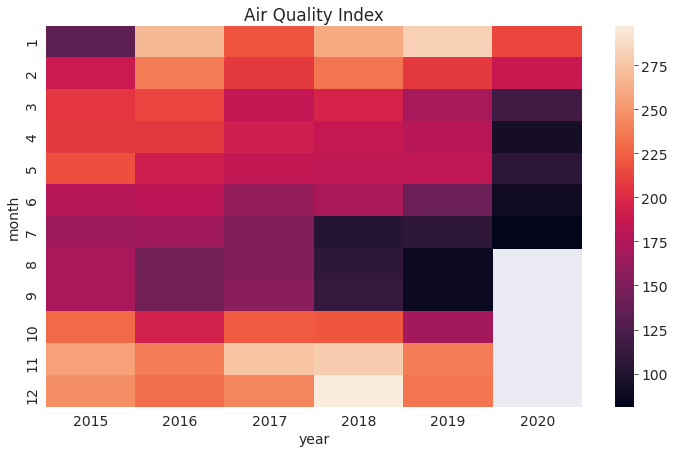

In [51]:
plt.title("Air Quality Index")
sns.heatmap(air_quality_matrix);

The last few cells of the year 2020 are blank as we don't have any data for the last few months of the year. The general trend we can observe is that, the AQI has significantly decreased in 2020, probably due to the pandemic, which is responsible for the lockdown, in turn controlling the human activities which led to a lot of air pollution previosuly. Also, the AQI seems to be less during the summer months and high during the winter months, probably due to some scientific reasons like, the density of air closer to land being more.

Let's draw a line graph to observe the variation in concentrations of the pollutants over the years. For that, first we create a list of years from 2015 to 2020, to go on the X-axis and then after obtaining the mean concentrations of the pollutants for each each year, plot the pollutants individually on the graph.

In [62]:
year = sorted(list(air_quality_raw_df.year.unique()))
year

[2015, 2016, 2017, 2018, 2019, 2020]

In [63]:
year_poll_df = air_quality_raw_df.groupby('year')[pollutants].mean()
pm25 = list(year_poll_df['PM2.5'])
pm10 = list(year_poll_df['PM10'])
no = list(year_poll_df['NO'])
no2 = list(year_poll_df['NO2'])
nox = list(year_poll_df['NOx'])
nh3 = list(year_poll_df['NH3'])
co = list(year_poll_df['CO'])
so2 = list(year_poll_df['SO2'])
o3 = list(year_poll_df['O3'])
benzene = list(year_poll_df['Benzene'])
toluene = list(year_poll_df['Toluene'])
xylene = list(year_poll_df['Xylene'])

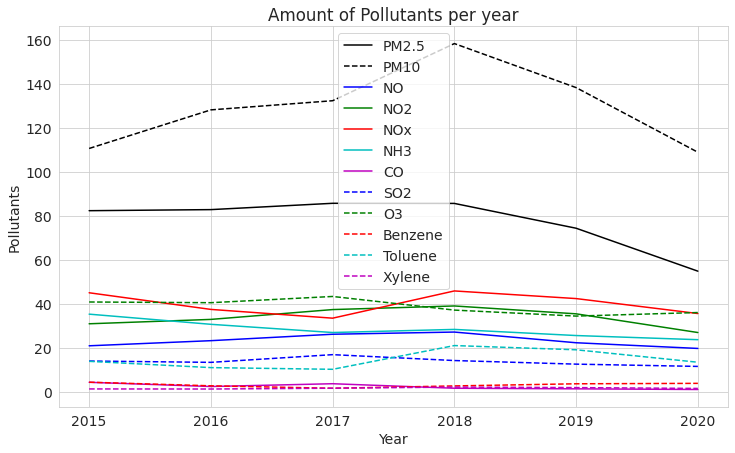

In [64]:
sns.set_style("whitegrid")
plt.plot(year, pm25, '-k')
plt.plot(year, pm10, '--k')
plt.plot(year, no, '-b')
plt.plot(year, no2, '-g')
plt.plot(year, nox, '-r')
plt.plot(year, nh3, '-c')
plt.plot(year, co, '-m')
plt.plot(year, so2, '--b')
plt.plot(year, o3, '--g')
plt.plot(year, benzene, '--r')
plt.plot(year, toluene, '--c')
plt.plot(year, xylene, '--m')

plt.xlabel('Year')
plt.ylabel('Pollutants')

plt.title("Amount of Pollutants per year")
plt.legend(pollutants);

We can see that the relative concentrations of the pollutants among each other resonate with the first bar graph we made. We can also see that the concentration of most pollutants is the highest for the year 2018(or 2017 in some cases) and from there on decreases till the year 2020.

In [66]:
year_aqi_conc_df = air_quality_raw_df.groupby('year')[['Total_conc', 'AQI']].mean()
year_aqi_conc_df['year'] = year
year_aqi_conc_df

,Total_conc,AQI,year
year,,,
2015,403.822511,200.515974,2015
2016,406.612959,200.998899,2016
2017,419.386309,198.386098,2017
2018,463.130643,194.214368,2018
2019,411.375064,171.945611,2019
2020,337.237761,133.396901,2020


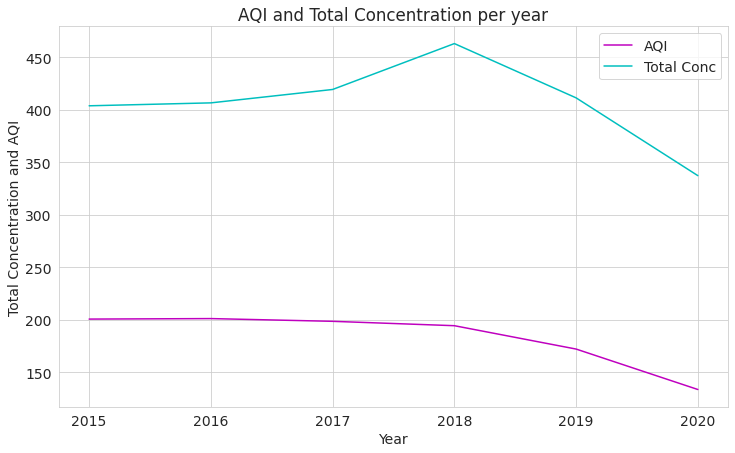

In [68]:
sns.set_style("whitegrid")
plt.plot(year_aqi_conc_df.year, year_aqi_conc_df.AQI, '-m')
plt.plot(year_aqi_conc_df.year, year_aqi_conc_df.Total_conc, '-c')
plt.xlabel('Year')
plt.ylabel('Total Concentration and AQI')

plt.title("AQI and Total Concentration per year")
plt.legend(['AQI', 'Total Conc']);

The general trend can be seen as the AQI increasing as the total concentration increases and decreasing as the total concentration decreases. Although, one anomaly can be observed for the year 2018, when the total concentration increases significantly, but the same trend is not observed for AQI. This also shows that the formula for AQI is much more complicated than just a few arithmetic operations on the concentrations of the pollutants.

Let us save and upload our work to Jovian before continuing

In [69]:
import jovian

In [70]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "sejalgupta01/air-quality-in-india" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sejalgupta01/air-quality-in-india


'https://jovian.ml/sejalgupta01/air-quality-in-india'

## Asking and Answering Questions

In this section, we ask and answer interesting questions about the data which finally help us to utilize all the information that we have and draw some useful conclusions. This section basically converts our information into knowledge.

#### Which station has the best air quality and which station has the most hazardous air quality on an overall basis?

To proceed with this, we'll first group the mean values of the AQI according to the Stations, using the `groupby()` method, and put this into a new dataframe called `aqi_stations_df`. This data frame has the **StationId** as the indexing column and the mean values of AQI for each station in the column **AQI**(over the whole time period that we're given the data for). Then we sort it according to the **AQI** column. Hence, the best air quality is for the station in the first row and the worst air quality is for the station in the last row.

In [76]:
aqi_stations_df = air_quality_raw_df.groupby('StationId')[['AQI']].mean()

In [83]:
aqi_stations_df = aqi_stations_df.sort_values('AQI')
aqi_stations_df

,AQI
StationId,
MZ001,34.853982
ML001,49.783871
KA010,63.478222
KL007,66.546703
MH006,70.642889
...,...
DL038,270.707483
DL033,274.824291
DL028,317.014114


In [78]:
lowest_aqi = list(aqi_stations_df.AQI)[0]
highest_aqi = list(aqi_stations_df.AQI)[-1]
lowest_aqi_station = list(aqi_stations_df.index)[0]
highest_aqi_station = list(aqi_stations_df.index)[-1]

In [79]:
print("{} has the best air quality with an overall average AQI of {}.".format(lowest_aqi_station, lowest_aqi))
print("{} has the worst air quality with an overall average AQI of {}.".format(highest_aqi_station, highest_aqi))

MZ001 has the best air quality with an overall average AQI of 34.85398230088496.
GJ001 has the worst air quality with an overall average AQI of 395.66426082628175.


#### Which year gave Indians the most liberty to breathe and which year proved to be the worst for our lungs?

To find this out, we'll first create a new dataframe called `year_aqi_df`, using `groupby()`, which contains the average AQI for each year, across all the stations in India that we have the data for. We'll sort it in descending order, and the year in the first row is the year our lungs suffered and the year in the last row allowed us to breather freely :)

In [82]:
year_aqi_df = air_quality_raw_df.groupby('year')[['AQI']].mean()
year_aqi_df['year'] = year
year_aqi_df = year_aqi_df.sort_values('AQI', ascending=False)
year_aqi_df

,AQI,year
year,,
2016,200.998899,2016
2015,200.515974,2015
2017,198.386098,2017
2018,194.214368,2018
2019,171.945611,2019
2020,133.396901,2020


In [87]:
print("{} gave Indians the most liberty to breathe and {} proved to be the worst for our lungs.".format(int(year_aqi_df.iloc[-1]['year']), int(year_aqi_df.iloc[0]['year'])))

2020 gave Indians the most liberty to breathe and 2016 proved to be the worst for our lungs.


Air pollution reduced in 2020 because we couldn't go out, and now that we have cleaner air, it's sad that we can't go out.
Serves us right :/

#### Which day witnessed the most pollued air?

To find that out, we'll use `groupby()` to create a new dataframe called `aqi_day_df` which contains the average value of AQI across all stations on every particular day, sort it in descending order, and the day in the first row has the highest AQI among all others.

In [88]:
aqi_day_df = air_quality_raw_df.groupby('Date')[['AQI']].mean()

In [89]:
aqi_day_df = aqi_day_df.sort_values('AQI', ascending=False)
aqi_day_df

,AQI
Date,
2019-01-03,396.033625
2018-12-23,380.989947
2017-11-09,380.925065
2018-12-24,375.065162
2017-11-08,374.916651
...,...
2019-09-30,72.883879
2019-08-18,72.539269
2019-08-17,71.805217


In [96]:
date = str(aqi_day_df.index[0]).split()[0]
print("{} witnessed the most hazardous air quality in 6 years.".format(date))

2019-01-03 witnessed the most hazardous air quality in 6 years.


#### Find the ranges to categorize the AQI values into appropriate AQI buckets.

First we create a new dataframe `aqi_df` which contains all values of AQI and the corresponding AQI buckets, taken from the original dataframe `air_quality_raw_df`. Then we discard all the `nan` values. Then we create a list **aqi_bucket** containing unique values for all the buckets. Finally, we iterate through all the buckets, create a temporary dataframe for each, containing only the AQI values for that particular bucket and find the minimum and maximum AQI values for each bucket using `temp_df`. 

In [97]:
aqi_data = {'AQI_Bucket': list(air_quality_raw_df.AQI_Bucket), 'AQI': list(air_quality_raw_df.AQI)} 
aqi_df = pd.DataFrame(aqi_data) 
aqi_df

,AQI_Bucket,AQI
0,NaN,NaN
1,Moderate,184.0
2,Moderate,197.0
3,Moderate,198.0
4,Moderate,188.0
...,...,...
108030,Good,50.0
108031,Satisfactory,65.0
108032,Satisfactory,63.0
108033,Satisfactory,57.0


In [98]:
aqi_df = aqi_df.dropna()
aqi_df = aqi_df.reset_index(drop=True)
aqi_df

,AQI_Bucket,AQI
0,Moderate,184.0
1,Moderate,197.0
2,Moderate,198.0
3,Moderate,188.0
4,Moderate,173.0
...,...,...
87020,Good,50.0
87021,Satisfactory,65.0
87022,Satisfactory,63.0
87023,Satisfactory,57.0


In [99]:
aqi_bucket = list(aqi_df.AQI_Bucket.unique())

In [100]:
for bucket in aqi_bucket:
    temp_df = aqi_df[aqi_df.AQI_Bucket == bucket]
    print("The range for " + bucket + " AQI Bucket is from {} to {}.".format(temp_df.AQI.min(), temp_df.AQI.max()))

The range for Moderate AQI Bucket is from 101.0 to 200.0.
The range for Poor AQI Bucket is from 201.0 to 300.0.
The range for Very Poor AQI Bucket is from 301.0 to 400.0.
The range for Satisfactory AQI Bucket is from 51.0 to 100.0.
The range for Good AQI Bucket is from 8.0 to 50.0.
The range for Severe AQI Bucket is from 401.0 to 2049.0.


#### What is the overall status of the air quality? Do we need to worry about it?

To get an idea about the overall status of the air quality in India, let's plot a pie chart using the percentage with which each bucket appears in the dataframe. The bucket that appears the most will tell us about the overall inclination of the air quality. To do this, we create a dictionary with buckets as keys and the percentage with which they appear in the dataframe as values, and plot it in a pie chart. **Disclaimer: This won't give accurate values, only an overall idea, as there were some null values in AQI_Bucket column**.

In [110]:
d = {i: 0 for i in aqi_bucket}
for b in aqi_bucket:
    d[b] = len(aqi_df[aqi_df.AQI_Bucket == b])
d

{'Moderate': 29417,
 'Poor': 11493,
 'Very Poor': 11762,
 'Satisfactory': 23636,
 'Good': 5510,
 'Severe': 5207}

In [116]:
total = sum(d.values())
for i in d:
    d[i] /= total
    d[i] *= 100
percentages = list(d.values())

Text(0.5, 1.0, 'Overall status of the Air Quality')

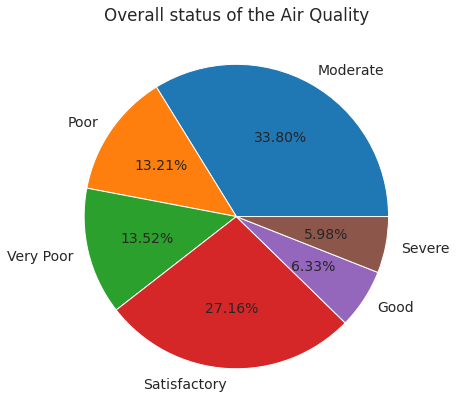

In [125]:
plt.pie(percentages, labels=aqi_bucket, autopct='%0.2f%%')
plt.title("Overall status of the Air Quality")

The percentage of the **Severe, Poor and Very Poor** buckets is worrying.

Let us save and upload our work to Jovian before continuing.

In [126]:
import jovian

In [127]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "sejalgupta01/air-quality-in-india" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sejalgupta01/air-quality-in-india


'https://jovian.ml/sejalgupta01/air-quality-in-india'

## Inferences and Conclusion

We have observed that 2016-2018 have been the worst years as far as air pollution is concerned, and 2020 has witnessed some improvement in that concern. The major behavorial change has been humans not stepping out of their homes and offices and factories being closed, which directly implies, less pollution by private vehicles and less industrial pollution. Hence, we can conclude that humans are an extremely significant factor that contributes to increasing air pollution. It is a matter of worry and even after the pandemic, we should look after it on an individual level at least.

In [128]:
import jovian

In [129]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "sejalgupta01/air-quality-in-india" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sejalgupta01/air-quality-in-india


'https://jovian.ml/sejalgupta01/air-quality-in-india'

## References and Future Work

### Future Work
We know that there are some null values in the column **AQI_Bucket**, while there is only 1 null value in the column **AQI**. In one of the questions, we find out the ranges for each bucket. So the next step to improve the dataset could be, assigning non-null values to **AQI_Bucket**, using the **AQI** for corresponding rows. Also, for the first row which has a `nan` value for both, we can either discard the row or find out the formula for AQI using the concentrations of the pollutants, and assign it an appropriate non-null value.

### References
1. Dataset - [Kaggle](https://www.kaggle.com/)
2. Fixing Bugs - [StackOverflow](https://stackoverflow.com/)
3. Learning - [Pandas Docs](https://pandas.pydata.org/), [Matplotlib Docs](https://matplotlib.org/) and [ZeroToPandas Lecture Notebooks](https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas)

In [130]:
import jovian

In [131]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "sejalgupta01/air-quality-in-india" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sejalgupta01/air-quality-in-india


'https://jovian.ml/sejalgupta01/air-quality-in-india'